# 01 – Exploratory Data Analysis (EDA)

## 1. Introduction

This notebook performs Exploratory Data Analysis (EDA) on the Cardiovascular Disease Dataset from Kaggle.
The goal is to understand the distribution, patterns, and relationships within the dataset before preprocessing and modeling.

## 2. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")

## 3. Load the Dataset

In [2]:
df = pd.read_csv("../data/raw/cardio_train.csv", sep = ";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 4. Dataset Overview

### 4.1 Shape of Dataset

In [3]:
df.shape

(70000, 13)

### 4.2 Column Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### 4.3 Statistical Summary

In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## 5. Missing Values Check

In [6]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## 6. Add Derived Columns

Convert Age (days) → Age in Years

In [7]:
df['age_years'] = (df['age'] / 365).astype(int)
df[['age', 'age_years']].head()

,age,age_years
0,18393,50
1,20228,55
2,18857,51
3,17623,48
4,17474,47


## 7. Univariate Analysis

### 7.1 Age Distribution

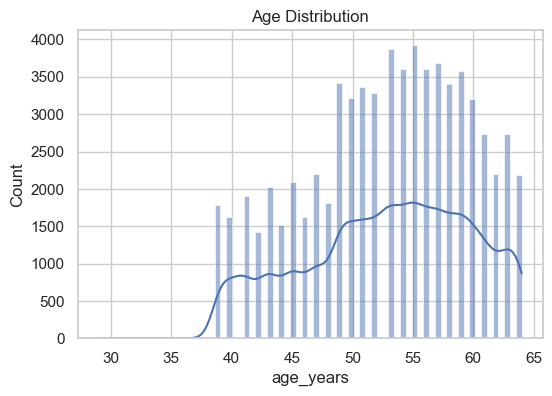

In [8]:
plt.figure(figsize = (6, 4))
sns.histplot(df['age_years'], kde = True) # A KDE curve shows a smoothed version of that distribution.
plt.title('Age Distribution')
plt.show()

### 7.2 Height Distribution

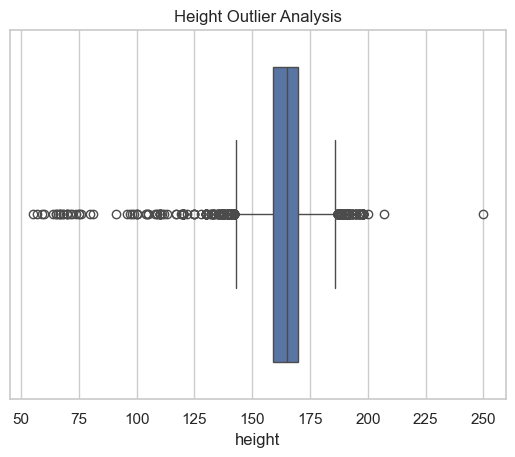

In [9]:
sns.boxplot(x = df['height'])
plt.title('Height Outlier Analysis')
plt.show()

### 7.3 Weight Distribution

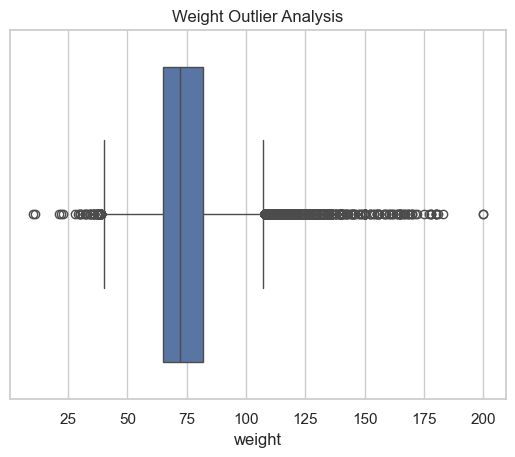

In [10]:
sns.boxplot(x = df['weight'])
plt.title('Weight Outlier Analysis')
plt.show()

### 7.4 Systolic Blood Pressure (ap_hi)

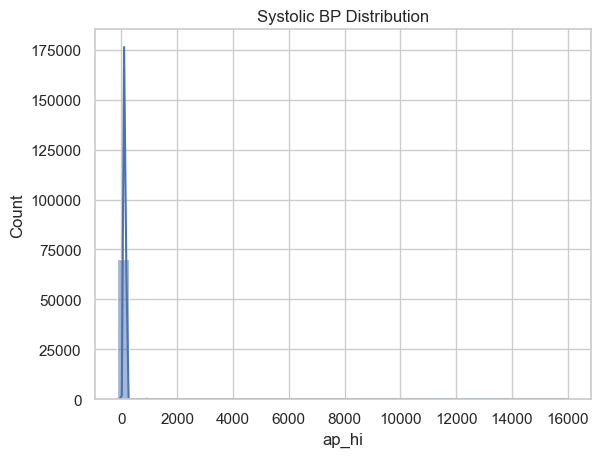

In [11]:
sns.histplot(df['ap_hi'], bins = 40, kde = True)
plt.title('Systolic BP Distribution')
plt.show()

### 7.5 Diastolic Blood Pressure (ap_lo)

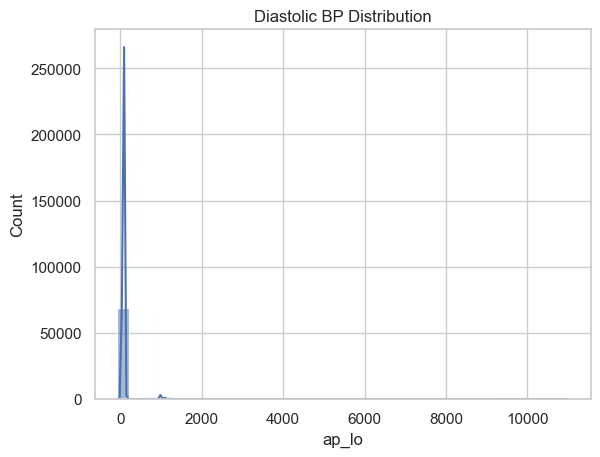

In [12]:
sns.histplot(df['ap_lo'], bins = 40, kde = True)
plt.title('Diastolic BP Distribution')
plt.show()

### 7.6 Target Variable (cardio)

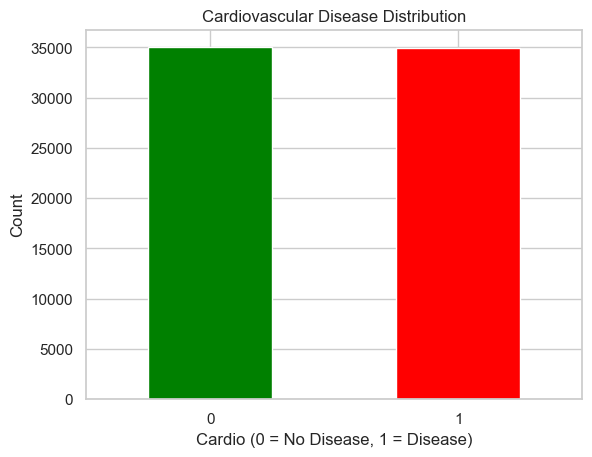

In [13]:
df['cardio'].value_counts().plot(kind = 'bar', color = ['green', 'red'])
plt.title('Cardiovascular Disease Distribution')
plt.xlabel('Cardio (0 = No Disease, 1 = Disease)')
plt.xticks(rotation = 0) # fix rotation of the xlabel.
plt.ylabel('Count')
plt.show()

## 8. Bivariate Analysis (Feature vs Target)

### 8.1 Age vs Disease

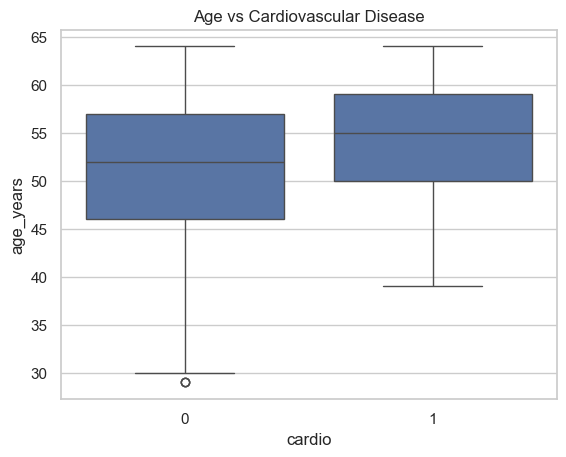

In [14]:
sns.boxplot(data = df, x = 'cardio', y = 'age_years')
plt.title('Age vs Cardiovascular Disease')
plt.show()

### 8.2 Cholesterol vs Disease

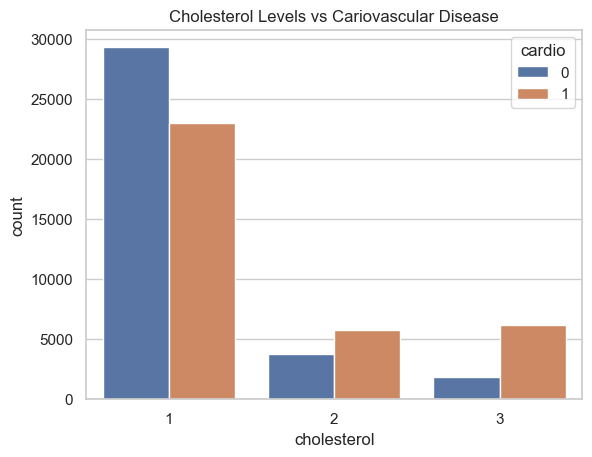

In [15]:
sns.countplot(data = df, x = 'cholesterol', hue = 'cardio') # hue - It adds color-coded subgroups inside each main category.
plt.title('Cholesterol Levels vs Cariovascular Disease')
plt.show()

### 8.3 Glucose vs Disease

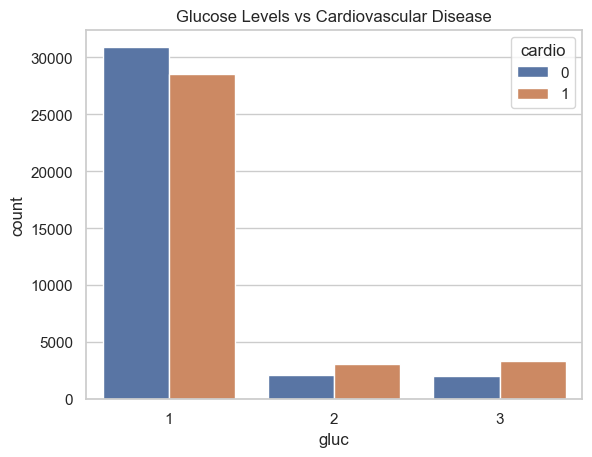

In [16]:
sns.countplot(data = df, x = 'gluc', hue = 'cardio') # do not use x = 'glucose' because it is a name of a column in df and will throw an error.
plt.title('Glucose Levels vs Cardiovascular Disease')
plt.show()

### 8.4 Smoking vs Disease

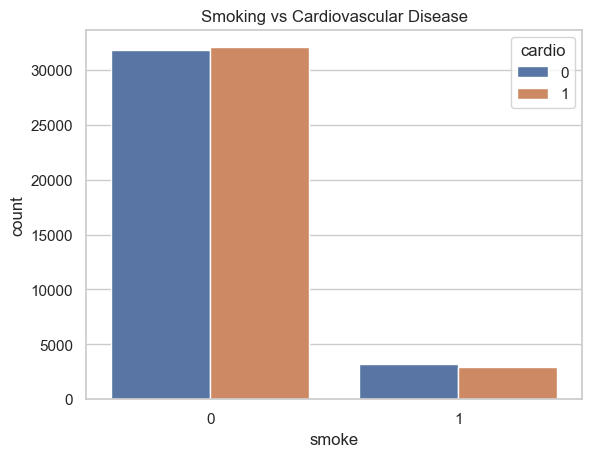

In [17]:
sns.countplot(data = df, x = 'smoke', hue = 'cardio')
plt.title('Smoking vs Cardiovascular Disease')
plt.show()

### 8.5 Alcohol Consumption vs Disease

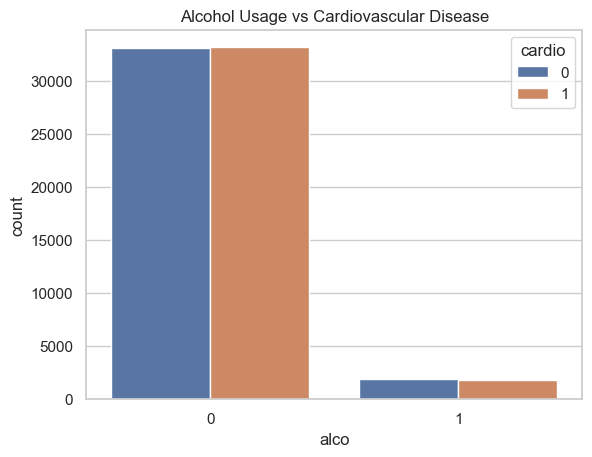

In [18]:
sns.countplot(data = df, x = 'alco', hue = 'cardio')
plt.title('Alcohol Usage vs Cardiovascular Disease')
plt.show()

### 8.6 Physical Activity vs Disease

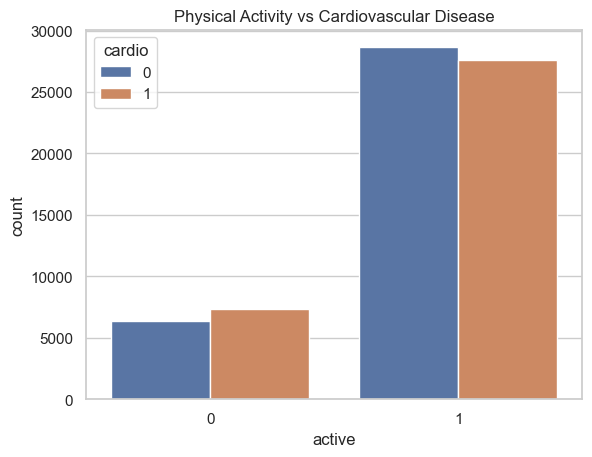

In [19]:
sns.countplot(data = df, x = 'active', hue = 'cardio')
plt.title('Physical Activity vs Cardiovascular Disease')
plt.show()

## 9. Correlation Analysis

### 9.1 Correlation Heatmap

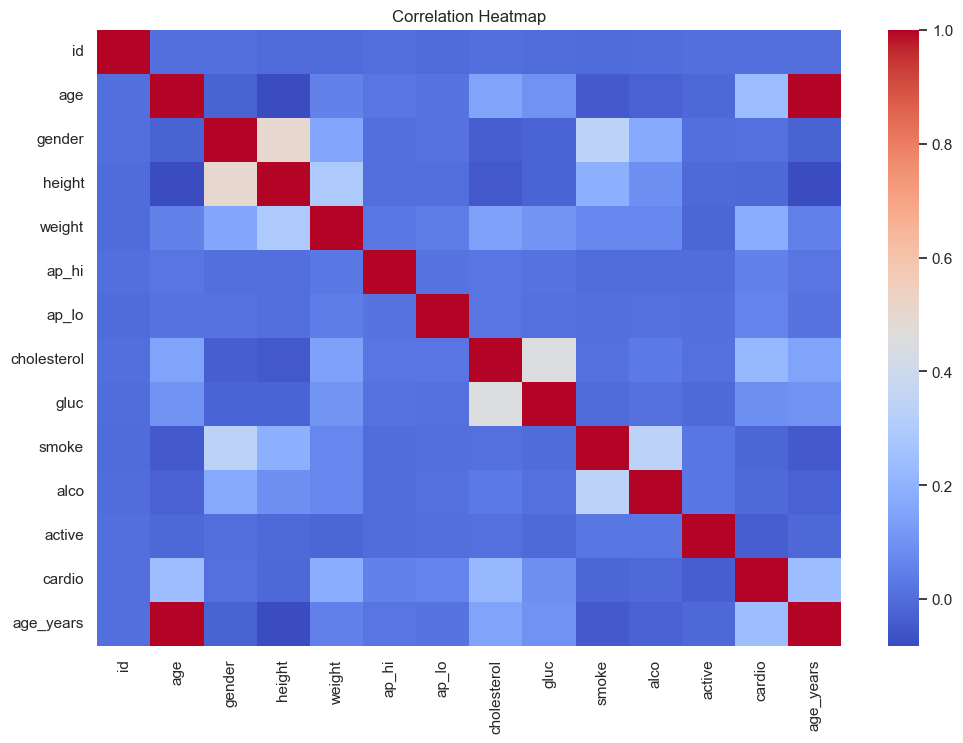

In [20]:
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = False) # annot controls whether to display the actual correlation numbers on each cell.
plt.title('Correlation Heatmap')
plt.show()

### 9.2 Most Important Correlations with cardio

In [47]:
df.corr()['cardio'].sort_values(ascending = False)

cardio         1.000000
age            0.238159
age_years      0.237985
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
id             0.003799
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64

## 10. Key Insights from EDA

### 1. The dataset contains 70,000 records and no missing values
### 2. Age, blood pressure, cholesterol, and glucose show strong relationships with cardiovascular disease
### 3. Several extreme outliers exist in height, weight, ap_hi, and ap_lo
### 4. Target variable is fairly balanced
### 5. Lifestyle factors (smoke, alco, active) have weaker correlations, but still significant